## **Hierarchical Clustering**

##### **Import libraries**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

##### **Load and Display Dataset**

In [13]:
data = pd.read_csv("Mall_Customers.csv")
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


>Select features for clustering

In [14]:
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [15]:
X.shape

(200, 2)

In [16]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


> Scatter plot of selected features

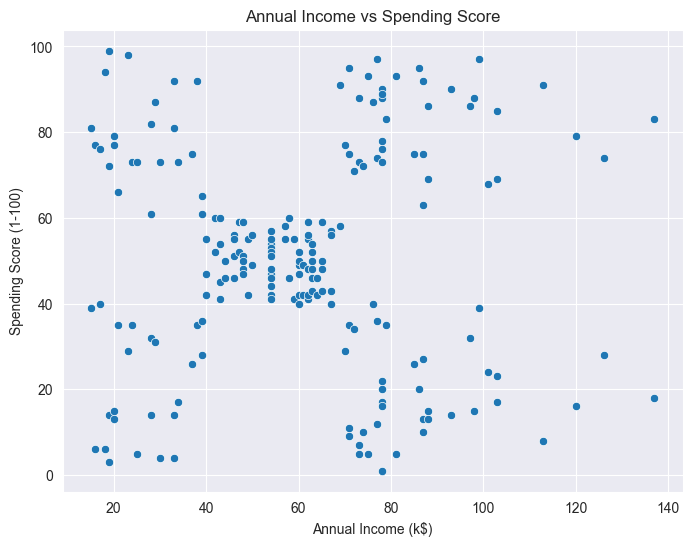

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.title("Annual Income vs Spending Score")
plt.show()

#### **Using the Dendrogram to Find the Optimal Number of Clusters**

In [18]:
import scipy.cluster.hierarchy as sch

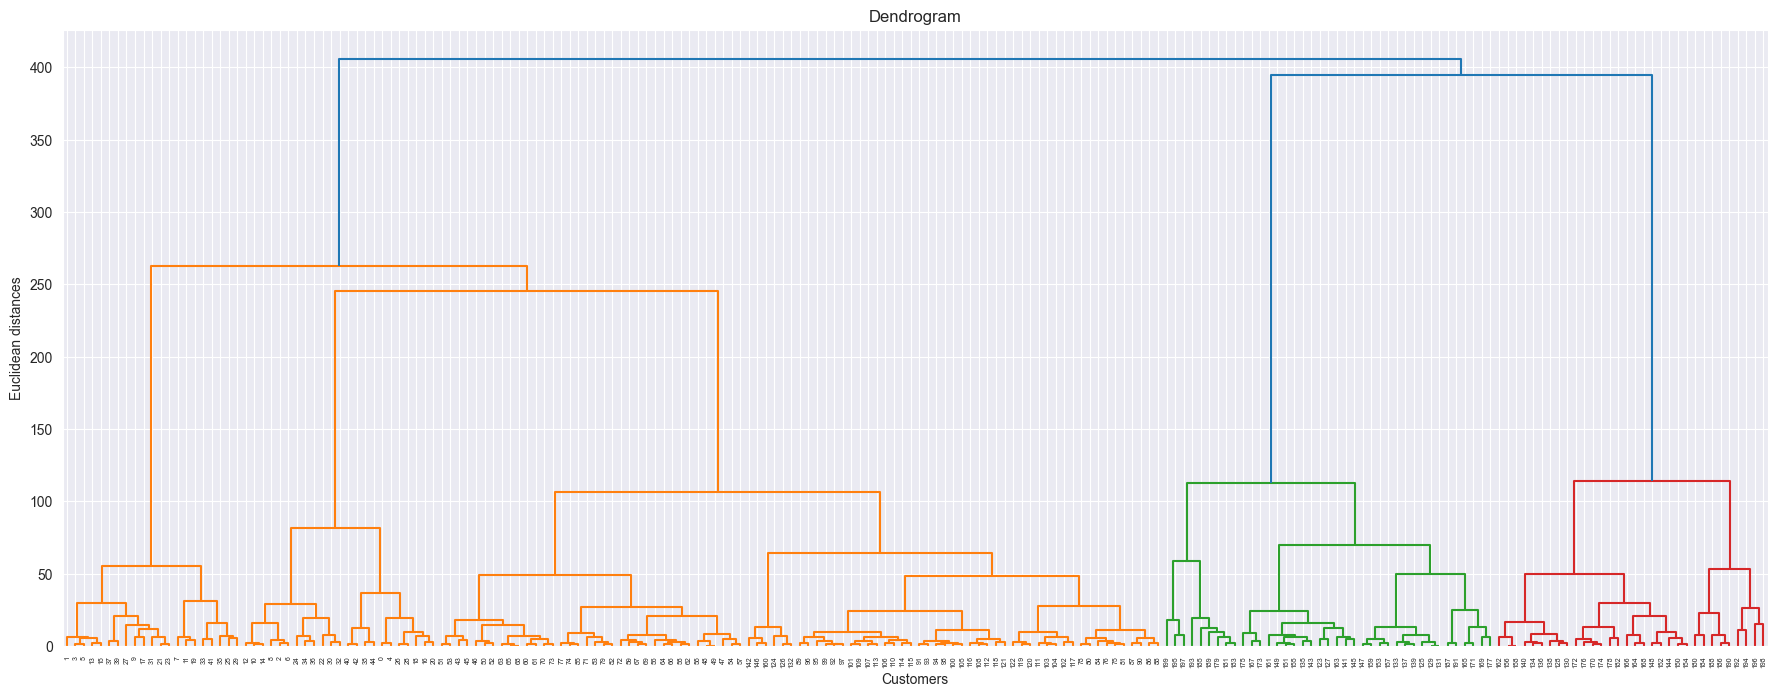

In [19]:
plt.figure(figsize=(22, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

#### **Training the Hierarchical Clustering Model**


In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
hc = AgglomerativeClustering(n_clusters=5, linkage="ward")
y_hc = hc.fit_predict(X)

#### **Plot Clustered Data With Centroids**

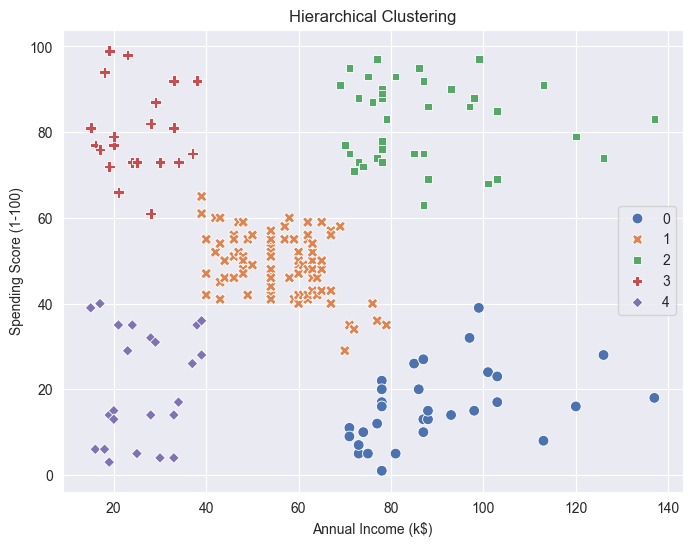

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=X,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue=y_hc,
    style=y_hc,
    palette="deep",
    s=60,
)
plt.title("Hierarchical Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()